import libraries

1. to handle the data

In [331]:
import pandas as pd
import numpy as np

2. To Viusalize the data

In [332]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap

3. To preprocess the data

In [333]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

4. import Iterative imputer

In [334]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

5. Machine Learning

In [335]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

6. For Classification task.

In [336]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

7. Metrics

In [337]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

8. Ignore warnings

In [338]:
import warnings
warnings.filterwarnings('ignore')

In [339]:
df = pd.read_csv("dataset.csv")

print the first 5 rows of the dataframe

In [340]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Exploring the data type of each column

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Checking the data shape

In [342]:
df.shape

(920, 16)

Id column

In [343]:
df['id'].min(), df['id'].max()

(np.int64(1), np.int64(920))

age column

In [344]:
df['age'].min(), df['age'].max()

(np.int64(28), np.int64(77))

lets summerize the age column

In [345]:
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [346]:
import seaborn as sns

Define custom colors

In [347]:
custom_colors = ["#FF5733", "#3366FF", "#33FF57"]  # Example colors, you can adjust as needed

Plot the histogram with custom colors

<Axes: xlabel='age', ylabel='Count'>

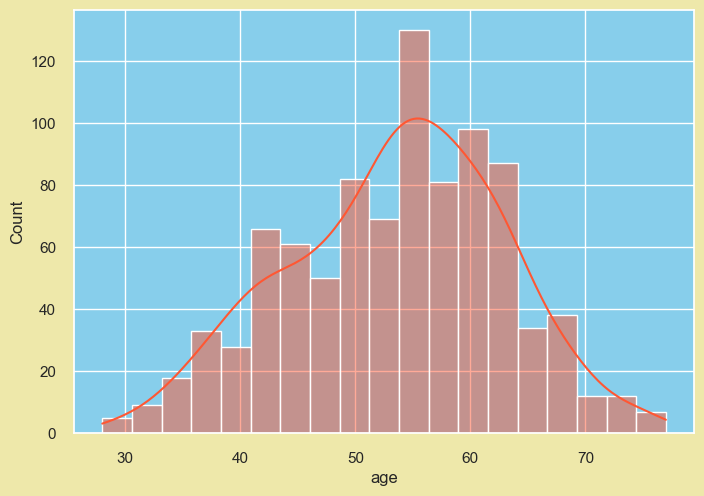

In [348]:
sns.histplot(df['age'], kde=True, color="#FF5733", palette=custom_colors)

Plot the mean, Median and mode of age column using sns

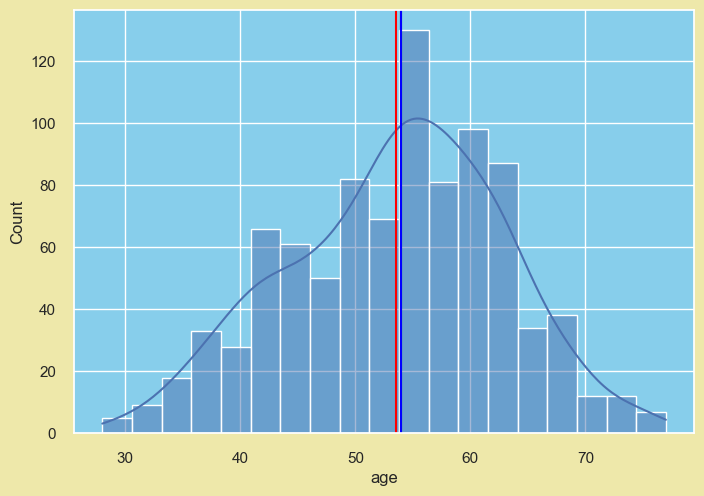

In [349]:
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='Red')
plt.axvline(df['age'].median(), color= 'Green')
plt.axvline(df['age'].mode()[0], color='Blue')

print the value of mean, median and mode of age column

In [350]:
print('Mean', df['age'].mean())
print('Median', df['age'].median())
print('Mode', df['age'].mode())

Mean 53.51086956521739
Median 54.0
Mode 0    54
Name: age, dtype: int64


plot the histogram of age column using plotly and coloring this by sex

In [351]:
fig = px.histogram(data_frame=df, x='age', color= 'sex')
fig.show()

Find the values of sex column

In [352]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

calculating the percentage fo male and female value counts in the data

In [353]:
male_count = 726
female_count = 194

In [354]:
total_count = male_count + female_count

calculate percentages

In [355]:
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

display the results

In [356]:
print(f'Male percentage i the data: {male_percentage:.2f}%')
print(f'Female percentage in the data : {female_percentages:.2f}%')

Male percentage i the data: 78.91%
Female percentage in the data : 21.09%


Difference

In [357]:
difference_percentage = ((male_count - female_count)/female_count) * 100
print(f'Males are {difference_percentage:.2f}% more than female in the data.')

Males are 274.23% more than female in the data.


In [358]:
726/194

3.7422680412371134

Find the values count of age column grouping by sex column

In [359]:
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

find the unique values in the dataset column

In [360]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [361]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

plot the countplot of dataset column

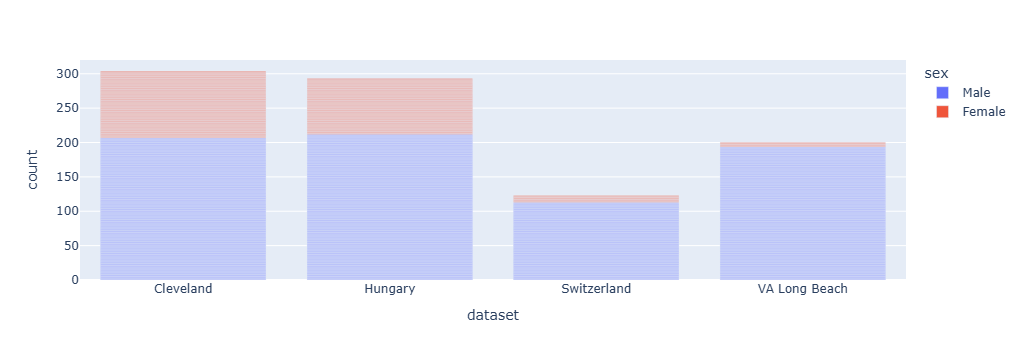

In [362]:
fig =px.bar(df, x='dataset', color='sex')
fig.show()

print the values of dataset column groupes by sex

In [363]:
print (df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


make a plot of age column using plotly and coloring by dataset

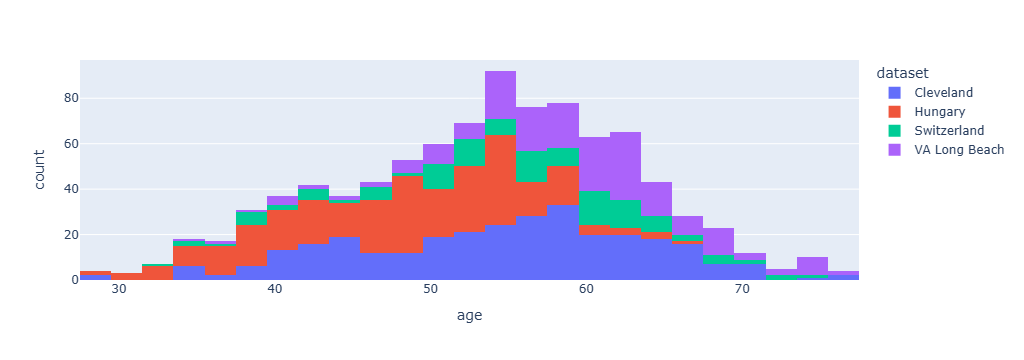

In [364]:
fig = px.histogram(data_frame=df, x='age', color= 'dataset')
fig.show()

print the mean median and mode of age column grouped by dataset column

In [365]:
# Group by 'dataset' column and calculate statistics
grouped_df = df.groupby('dataset')['age']

print("___________________________________________________________")
print("Mean of the dataset: ", grouped_df.mean() )
print("___________________________________________________________")
print("Median of the dataset: ", grouped_df.median())
print("___________________________________________________________")
print("Mode of the dataset: ", grouped_df.apply(lambda x: x.mode().tolist()) )
print("___________________________________________________________")


___________________________________________________________
Mean of the dataset:  dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
___________________________________________________________
Median of the dataset:  dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
___________________________________________________________
Mode of the dataset:  dataset
Cleveland            [58]
Hungary              [54]
Switzerland          [61]
VA Long Beach    [62, 63]
Name: age, dtype: object
___________________________________________________________


value count of cp column

In [366]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

count plot of cp column by sex column

<Axes: xlabel='cp', ylabel='count'>

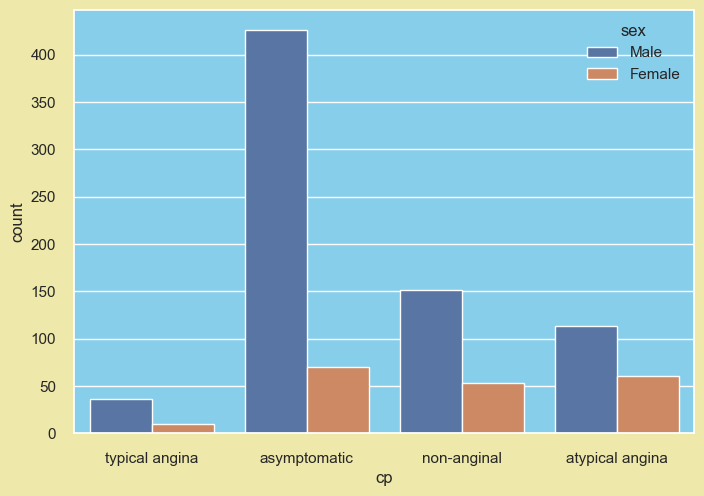

In [367]:
sns.countplot(df, x='cp', hue= 'sex')

count plot of cp column by dataset column

<Axes: xlabel='cp', ylabel='count'>

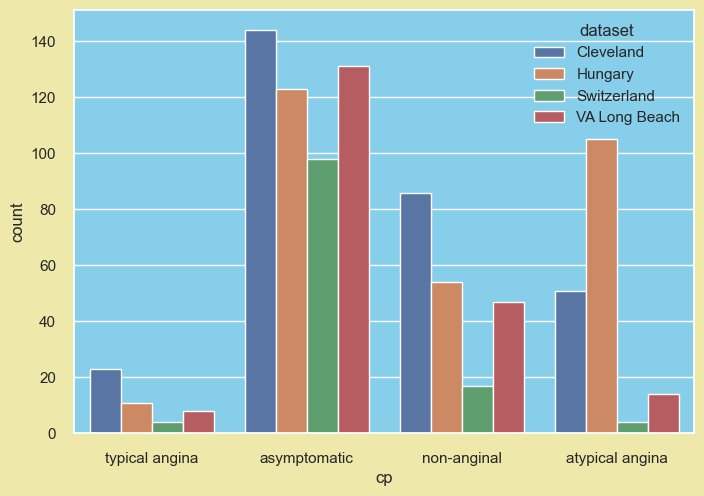

In [368]:
sns.countplot(df,x='cp',hue='dataset')

Draw the plot of age column group by cp column

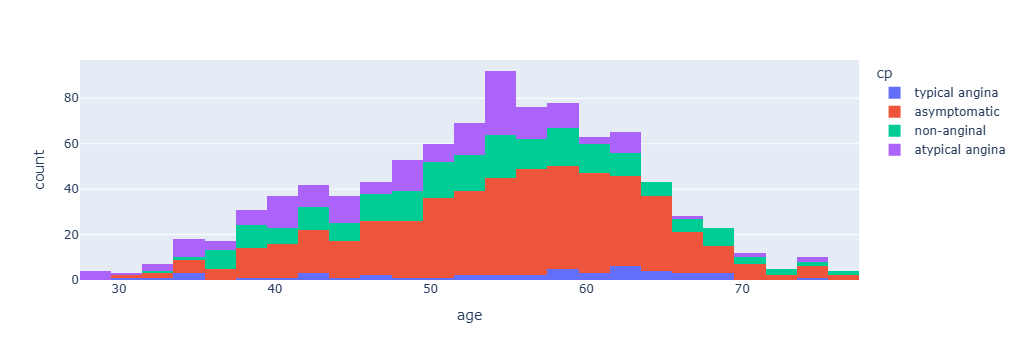

In [369]:
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

lets summerize the trestbps column

In [370]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

Dealing with Missing values in trestbps column.<br>
find the percentage of misssing values in trestbps column

In [371]:
print(f"Percentage of missing values in trestbps column: {df['trestbps'].isnull().sum() /len(df) *100:.2f}%")

Percentage of missing values in trestbps column: 6.41%


Impute the missing values of trestbps column using iterative imputer<br>
create an object of iteratvie imputer

In [372]:
imputer1 = IterativeImputer(max_iter=10, random_state=42)

Fit the imputer on trestbps column

In [373]:
imputer1.fit(df[['trestbps']])

IterativeImputer(random_state=42)

Transform the data

In [374]:
df['trestbps'] = imputer1.transform(df[['trestbps']])

Check the missing values in trestbps column

In [375]:
print(f"Missing values in trestbps column: {df['trestbps'].isnull().sum()}")

Missing values in trestbps column: 0


First lets see data types or category of columns

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


let's see which columns has missing values

In [377]:
(df.isnull().sum()  / len(df)* 100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
trestbps     0.000000
cp           0.000000
dataset      0.000000
age          0.000000
id           0.000000
sex          0.000000
num          0.000000
dtype: float64

create an object of iterative imputer

In [378]:
imputer2 = IterativeImputer(max_iter=10, random_state=42)

fit transform on ca,oldpeak, thal,chol and thalch columns

In [379]:
df['ca'] = imputer2.fit_transform(df[['ca']])
df['oldpeak'] = imputer2.fit_transform(df[['oldpeak']])
df['chol'] = imputer2.fit_transform(df[['chol']])
df['thalch'] = imputer2.fit_transform(df[['thalch']])

let's check again for missing values

In [380]:
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
sex          0.000000
age          0.000000
chol         0.000000
trestbps     0.000000
cp           0.000000
dataset      0.000000
oldpeak      0.000000
thalch       0.000000
ca           0.000000
num          0.000000
dtype: float64

In [381]:
print(f"The missing values in thal column are: {df['thal'].isnull().sum()}")

The missing values in thal column are: 486


In [382]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [383]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,NaN,0.676375,NaN,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,NaN,0.878788,NaN,0.676375,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,NaN,0.676375,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,NaN,0.878788,NaN,0.676375,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.000000,254.0,False,lv hypertrophy,93.000000,True,0.000000,NaN,0.676375,NaN,1


find missing values.

In [384]:
#The expression df.isnull().sum()[df.isnull().sum() < 0] is incorrect because the number of missing values (df.isnull().sum()) cannot be less than 0; it should be zero or greater.

df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

thal       486
slope      309
fbs         90
exang       55
restecg      2
dtype: int64

In [385]:
missing_data_cols = df.isnull().sum()[df.isnull().sum()>0].index.tolist()

In [386]:
missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

find categorical Columns

In [387]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

find Numerical Columns

In [388]:
Num_cols = df.select_dtypes(exclude='object').columns.tolist()
Num_cols

['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

In [389]:
print(f'categorical Columns: {cat_cols}')
print(f'numerical Columns: {Num_cols}')

categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


FInd columns

In [390]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','thalch', 'chol', 'trestbps']
bool_cols = ['fbs']
numerical_cols = ['oldpeak','age','restecg', 'cp', 'sex', 'num']

This function imputes missing values in categorical columnsdef impute_categorical_missing_data(passed_col):

In [440]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

 
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

remove warning

In [442]:
import warnings
warnings.filterwarnings('ignore')

impute missing values using our functions

In [443]:
# missing_data_cols = ['restecg', 'exang', 'slope', 'thal']

In [444]:
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numerical_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values restecg : 0.0%
The feature 'restecg' has been imputed with 61.41 accuracy

Missing Values exang : 0.0%
The feature 'exang' has been imputed with 79.89 accuracy

Missing Values slope : 0.0%
The feature 'slope' has been imputed with 78.26 accuracy

Missing Values thal : 0.0%
The feature 'thal' has been imputed with 75.54 accuracy



In [445]:
df.isnull().sum().sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [328]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,0.0,1.0,150.0,1.0,2.3,1.0,0.0,1.0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,1.0,1.0,108.0,0.0,1.5,0.0,3.0,0.0,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,1.0,1.0,129.0,0.0,2.6,0.0,2.0,0.0,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,1.0,0.0,187.0,1.0,3.5,1.0,0.0,0.0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,1.0,1.0,172.0,1.0,1.4,0.0,0.0,0.0,0


In [290]:
print("_________________________________________________________________________________________________________________________________________________")

_________________________________________________________________________________________________________________________________________________


In [254]:
sns.set(rc={"axes.facecolor":"#87CEEB","figure.facecolor":"#EEE8AA"})  # Change figure background color

In [216]:
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

In [217]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [220]:
for i, col in enumerate(cols):
    plt.subplot(3,2)
    sns.boxenplot(color=palette[i % len(palette)])  # Use modulo to cycle through colors
    plt.title(i)

NameError: name 'cols' is not defined

In [430]:
plt.show()
##E6E6FA

print the row from df where trestbps value is 0

In [406]:
df[df['trestbps']==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,1.0,1.5,flat,0.676375,NaN,3


Remove the column because it is an outlier because trestbps cannot be zero.

In [407]:
df= df[df['trestbps']!=0]

In [408]:
sns.set(rc={"axes.facecolor":"#B76E79","figure.facecolor":"#C0C0C0"})
modified_palette = ["#C44D53", "#B76E79", "#DDA4A5", "#B3BCC4", "#A2867E", "#F3AB60"]
cmap = ListedColormap(modified_palette)

In [409]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [410]:
for i, col in enumerate(cols):
    plt.subplot(3,2)
    sns.boxenplot( color=palette[i % len(palette)])  # Use modulo to cycle through colors
    plt.title(col)

NameError: name 'cols' is not defined

In [411]:
plt.show()

In [412]:
df.trestbps.describe()

count    919.000000
mean     132.276183
std       17.930662
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [413]:
df.describe()

,id,age,trestbps,chol,thalch,exang,oldpeak,ca,num
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,460.180631,53.509249,132.276183,199.347019,137.526672,0.573449,0.878112,0.676375,0.993471
std,265.693391,9.429689,17.930662,108.818455,25.145577,0.494845,1.054148,0.541962,1.141398
min,1.000000,28.000000,80.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,230.500000,47.000000,120.000000,178.500000,120.000000,0.000000,0.000000,0.676375,0.000000
50%,460.000000,54.000000,130.000000,221.000000,138.000000,1.000000,0.800000,0.676375,1.000000
75%,689.500000,60.000000,140.000000,267.000000,156.000000,1.000000,1.500000,0.676375,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [414]:
print("___________________________________________________________________________________________________________________________________________________________________")

___________________________________________________________________________________________________________________________________________________________________


Set facecolors

In [415]:
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})

Define the "night vision" color palette

In [416]:
night_vision_palette = ["#00FF00", "#FF00FF", "#00FFFF", "#FFFF00", "#FF0000", "#0000FF"]

Use the "night vision" palette for the plots

In [417]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(cols):
    plt.subplot(3,2)
    sns.boxenplot( color=palette[i % len(palette)])  # Use modulo to cycle through colors
    plt.title(col)

NameError: name 'cols' is not defined

<Figure size 1000x800 with 0 Axes>

In [418]:
plt.show()

In [419]:
df.age.describe()

count    919.000000
mean      53.509249
std        9.429689
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [420]:
palette = ["#999999", "#666666", "#333333"]

<Axes: xlabel='trestbps', ylabel='Count'>

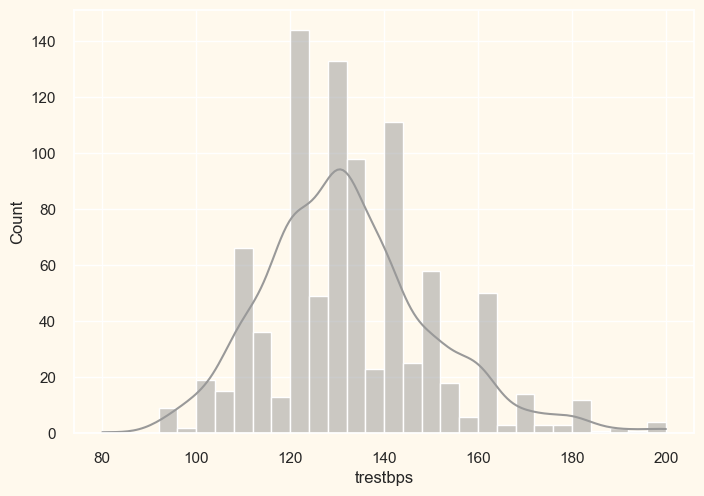

In [421]:
sns.histplot(data=df,
             x='trestbps',
             kde=True,
             color=palette[0])

Text(0, 0.5, 'Count')

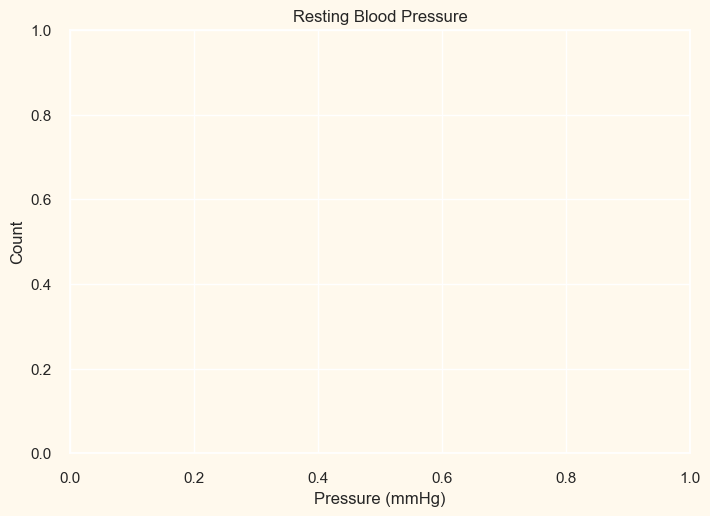

In [422]:
plt.title('Resting Blood Pressure')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Count')

In [423]:
plt.style.use('default')
plt.rcParams['figure.facecolor'] = palette[1]
plt.rcParams['axes.facecolor'] = palette[2]

create a histplot trestbops column to analyse with sex column

<Axes: xlabel='trestbps', ylabel='Count'>

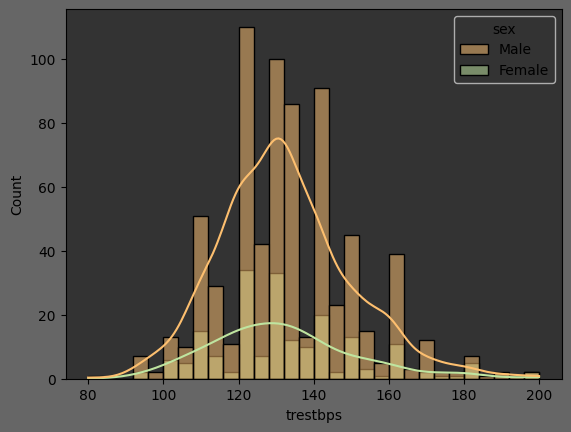

In [424]:
sns.histplot(df, x='trestbps', kde=True, palette = "Spectral", hue ='sex')

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   917 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    float64
 11  oldpeak   919 non-null    float64
 12  slope     610 non-null    object 
 13  ca        919 non-null    float64
 14  thal      434 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(6), int64(3), object(7)
memory usage: 122.1+ KB


In [426]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [427]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,1.0,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,0.0,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,0.0,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,1.0,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,1.0,1.4,upsloping,0.0,normal,0


split the data into X and y

In [503]:
df = pd.read_csv("cleaned.csv")
# lets encode the sex column using label encoder
le_sex=LabelEncoder()
df['sex']=le_sex.fit_transform(df[['sex']])
# lets encode the dataset column using label encoder
le_dataset=LabelEncoder()
df['dataset']=le_dataset.fit_transform(df[['dataset']])
# lets encode the cp column using label encoder
le_cp=LabelEncoder()
df['cp']=le_cp.fit_transform(df[['cp']])
# lets encode the fbs column using label encoder
le_fbs=LabelEncoder()
df['fbs']=le_fbs.fit_transform(df[['fbs']])
# lets encode the trestecg column using label encoder
le_restecg=LabelEncoder()
df['restecg']=le_restecg.fit_transform(df[['restecg']])
# lets encode the exang column using label encoder
le_exang=LabelEncoder()
df['exang']=le_exang.fit_transform(df[['exang']])
# lets encode the slope column using label encoder
le_slope=LabelEncoder()
df['slope']=le_slope.fit_transform(df[['slope']])
# lets encode the thal column using label encoder
le_thal=LabelEncoder()
df['thal']=le_thal.fit_transform(df[['thal']])
# lets encode the trest_bins column using label encoder
le_trestbps_bins=LabelEncoder()
df['trestbps_bins']=le_trestbps_bins.fit_transform(df[['trestbps_bins']])
le_num_bins=LabelEncoder()
df['num_bins']=le_trestbps_bins.fit_transform(df[['num_bins']])
df.head()



,Unnamed: 0,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,trestbps_bins,num_bins
0,0,-5.199338,1.025747,1,0,3,0.816974,0.138332,1,0,0.453308,0,1.092736,0,0.0,0,0,0,2
1,1,-3.064732,1.498563,1,0,0,1.446104,0.971791,0,0,-1.156989,1,0.474594,1,3.0,1,2,0,0
2,2,-2.851066,1.498563,1,0,0,-0.688266,0.071054,0,0,-0.256732,1,1.358541,1,2.0,2,1,0,2
3,3,-2.719607,-1.681878,1,0,2,-0.066948,0.403916,0,1,2.377526,0,2.007821,0,0.0,1,0,0,2
4,4,-2.623052,-1.206386,0,0,1,-0.066948,-0.380326,0,0,1.351702,0,0.380326,2,0.0,1,0,0,2


In [506]:
numeric_cols = ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak']

In [507]:
scalar=StandardScaler()
df[numeric_cols]=scalar.fit_transform(df[numeric_cols])

In [508]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
pt_boxcox=PowerTransformer(standardize=True)
df[numeric_cols]=pt_boxcox.fit_transform(df[numeric_cols])
pt_yeojohnson=PowerTransformer(standardize=True)
df[numeric_cols]=pt_yeojohnson.fit_transform(df[numeric_cols])
qt_normal=QuantileTransformer(output_distribution='normal', random_state=42)
df[numeric_cols]=qt_normal.fit_transform(df[numeric_cols])

In [509]:
%%time
# importing libarariesfor classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
# import pipeline
from sklearn.pipeline import Pipeline
import random



# Remove Warnings
import warnings
warnings.filterwarnings('ignore')
# Disable LightGBM warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="No further splits with positive gain")

# Split the Data into X and y
X=df.drop('num', axis=1)
y=df['num']
random_state=42

# Split the Data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)
# call the models
models = {
    'Logistic Regression': (LogisticRegression(random_state=42), {}),
    'KNN': (KNeighborsClassifier(), {'model__n_neighbors': [10, 30]}),
    'SVC': (SVC(random_state=42), {'model__gamma': ['scale', 'auto']}),
    'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=42), {'model__max_depth': [5, 10, 15]}),
    'RandomForestClassifier': (RandomForestClassifier(random_state=42), {'model__n_estimators': [100, 200, 300], 'model__max_depth': [5, 10, 15]}),
    'GradientBoostingClassifier': (GradientBoostingClassifier(random_state=42), {'model__learning_rate': [0.1, 0.01, 0.001]}),
    'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'model__n_estimators': [50, 100, 200]}),
    'XGBClassifier': (XGBClassifier(random_state=42), {'model__max_depth': [3, 4, 5]}),
    'Naive Bayes': (GaussianNB(), {})
}
best_model=None
best_accuracy=0
for name,(models,params) in models.items():
    pipeline=Pipeline(steps=[
        ('model',models)
])
    # Apply the cross validation score
    scores=cross_val_score(pipeline, X_train, y_train,cv=5, verbose=0)
    # mean_accuracy
    mean_accuracy=scores.mean()
    # predict the pipeline
    pipeline.fit(X_train,y_train)
    # Train the pipeline
    y_pred=pipeline.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    # print the evaluation metrics
    print('Model', name)
    print('Cross_validation accuracy', mean_accuracy)
    print('accuracy', accuracy)
    print('\n')


    # Evaluate the model
    if accuracy > best_accuracy:
       best_accuracy = accuracy
       best_model = pipeline
# print the best model
print("Best Model is:", best_model)
# Save the best model
# import pickle
# pickle.dump(best_model, open('./save the models/Heart_Disese_project_pkl','wb'))





Model Logistic Regression
Cross_validation accuracy 0.7442176870748299
accuracy 0.7663043478260869


Model KNN
Cross_validation accuracy 0.5700680272108845
accuracy 0.6521739130434783


Model SVC
Cross_validation accuracy 0.5972789115646259
accuracy 0.6195652173913043


Model DecisionTreeClassifier
Cross_validation accuracy 0.8639455782312926
accuracy 0.8532608695652174


Model RandomForestClassifier
Cross_validation accuracy 0.8789115646258503
accuracy 0.9456521739130435


Model GradientBoostingClassifier
Cross_validation accuracy 0.8911564625850339
accuracy 0.9347826086956522


Model AdaBoostClassifier
Cross_validation accuracy 0.7115646258503402
accuracy 0.7119565217391305


Model XGBClassifier
Cross_validation accuracy 0.8857142857142858
accuracy 0.9347826086956522


Model Naive Bayes
Cross_validation accuracy 0.8394557823129251
accuracy 0.8478260869565217


Best Model is: Pipeline(steps=[('model', RandomForestClassifier(random_state=42))])
CPU times: total: 7.73 s
Wall time: 10.8 

In [ ]:
#Best Model

In [510]:
%%time
# importing libarariesfor classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
# import pipeline
from sklearn.pipeline import Pipeline
import random



# Remove Warnings
import warnings
warnings.filterwarnings('ignore')
# Disable LightGBM warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="No further splits with positive gain")

# Split the Data into X and y
X=df.drop('num', axis=1)
y=df['num']
random_state=42

# Split the Data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)
# call the models
models = {
    'Logistic Regression': (LogisticRegression(random_state=42), {}),
    'KNN': (KNeighborsClassifier(), {'model__n_neighbors': [10, 30]}),
    'SVC': (SVC(random_state=42), {'model__gamma': ['scale', 'auto']}),
    'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=42), {'model__max_depth': [5, 10, 15]}),
    'RandomForestClassifier': (RandomForestClassifier(random_state=42), {'model__n_estimators': [100, 200, 300], 'model__max_depth': [5, 10, 15]}),
    'GradientBoostingClassifier': (GradientBoostingClassifier(random_state=42), {'model__learning_rate': [0.1, 0.01, 0.001]}),
    'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'model__n_estimators': [50, 100, 200]}),
    'XGBClassifier': (XGBClassifier(random_state=42), {'model__max_depth': [3, 4, 5]}),
    'Naive Bayes': (GaussianNB(), {})
}
best_model=None
best_accuracy=0
for name,(models,params) in models.items():
    pipeline=Pipeline(steps=[
        ('model',models)
])
    # Apply the cross validation score
    scores=cross_val_score(pipeline, X_train, y_train,cv=5, verbose=0)
    # mean_accuracy
    mean_accuracy=scores.mean()
    # predict the pipeline
    pipeline.fit(X_train,y_train)
    # Train the pipeline
    y_pred=pipeline.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    # print the evaluation metrics
    print('Model', name)
    print('Cross_validation accuracy', mean_accuracy)
    print('accuracy', accuracy)
    print('\n')


    # Evaluate the model
    if accuracy > best_accuracy:
       best_accuracy = accuracy
       best_model = pipeline
# print the best model
print("Best Model is:", best_model)
# Save the best model
# import pickle
# pickle.dump(best_model, open('./save the models/Heart_Disese_project_pkl','wb'))

Model Logistic Regression
Cross_validation accuracy 0.7442176870748299
accuracy 0.7663043478260869


Model KNN
Cross_validation accuracy 0.5700680272108845
accuracy 0.6521739130434783


Model SVC
Cross_validation accuracy 0.5972789115646259
accuracy 0.6195652173913043


Model DecisionTreeClassifier
Cross_validation accuracy 0.8639455782312926
accuracy 0.8532608695652174


Model RandomForestClassifier
Cross_validation accuracy 0.8789115646258503
accuracy 0.9456521739130435


Model GradientBoostingClassifier
Cross_validation accuracy 0.8911564625850339
accuracy 0.9347826086956522


Model AdaBoostClassifier
Cross_validation accuracy 0.7115646258503402
accuracy 0.7119565217391305


Model XGBClassifier
Cross_validation accuracy 0.8857142857142858
accuracy 0.9347826086956522


Model Naive Bayes
Cross_validation accuracy 0.8394557823129251
accuracy 0.8478260869565217


Best Model is: Pipeline(steps=[('model', RandomForestClassifier(random_state=42))])
CPU times: total: 7.05 s
Wall time: 10.1 